## Importing Data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [7]:
oil_spills=pd.read_csv('../data/clean_data.csv').iloc[:, 1:]
oil_spills.head(6)

,date,cause,source,location,substance,volume,year_quarter
0,1/28/2013,Operator Error,Well,WAINWRIGHT,oil,1,1
1,11/10/2012,Equipment Failure,Battery,BONNYVILLE,water,2,4
2,3/29/2007,Equipment Failure,Pipeline,MEDICINE HAT,gas,2,1
3,3/21/2008,Equipment Failure,Pipeline,MEDICINE HAT,gas,2,1
4,4/3/2008,Equipment Failure,Pipeline,MEDICINE HAT,gas,2,2
5,11/2/2005,Operator Error,Pipeline,MEDICINE HAT,oil,1,4


## Updating categorical data to numerical values

In [25]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
oil_spills['cause']=number.fit_transform(oil_spills['cause'].astype('str'))
oil_spills['source']=number.fit_transform(oil_spills['source'].astype('str'))
oil_spills['location']=number.fit_transform(oil_spills['location'].astype('str'))
oil_spills['substance']=number.fit_transform(oil_spills['substance'].astype('str'))
oil_spills.head(6)

,date,cause,source,location,substance,volume,year_quarter
0,1/28/2013,1,2,8,1,1,1
1,11/10/2012,0,0,0,2,2,4
2,3/29/2007,0,1,4,0,2,1
3,3/21/2008,0,1,4,0,2,1
4,4/3/2008,0,1,4,0,2,2
5,11/2/2005,1,1,4,1,1,4


## Fit a decision tree model using sklearn 

In [28]:
# Create X (i.e., features) and y (i.e., target)
X = oil_spills.iloc[:,2:]
y = oil_spills.iloc[:,1]

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
model.score(X,y)

0.8311333636777424

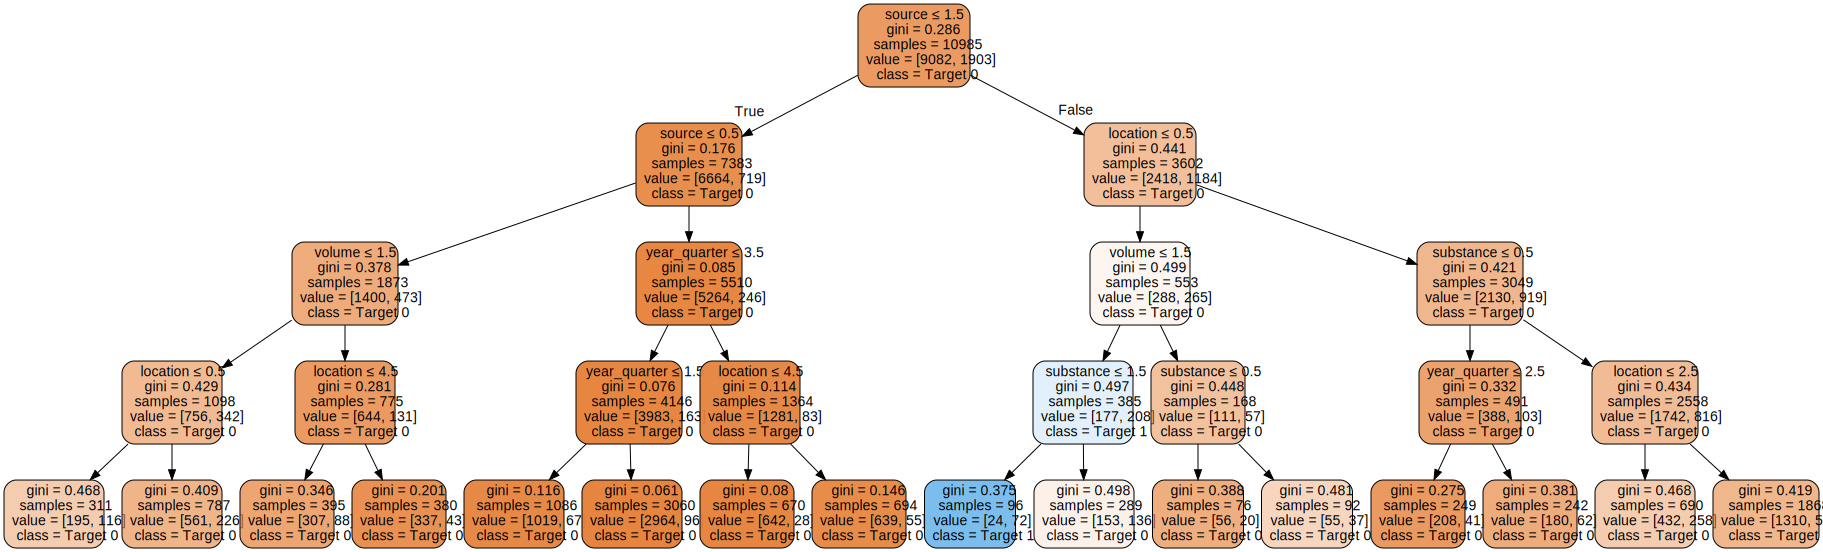

In [35]:
import graphviz
feature_cols=X.columns.values.tolist()
def save_and_show_decision_tree(model, 
                                class_names = ['Target 0', 'Target 1'], 
                                save_file_prefix = 'Q3', **kwargs):
    """
    Saves the decision tree model as a pdf and a 
    """
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=feature_cols,  
                             class_names=class_names,  
                             filled=True, rounded=True,  
                             special_characters=True, **kwargs)  

    graph = graphviz.Source(dot_data) 
    graph.render(save_file_prefix) 
    return graph

graph = save_and_show_decision_tree(model)
graph